# **PREPROCESSING FOR EXPECTED GOAL PROJECT**

**Stu. Name**: Amirali Khatib, Amirali Bagherzadeh

**Stu. Id**: 4032315014, 4031315278

**Prof. Name**: Dr. Alireza Shadman

# **INITIALIZATION**

**Import required libraries**

In [ ]:
! pip install mplsoccer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install gdown

In [ ]:
# !gdown "https://drive.google.com/uc?id=1--GJ099poWCurCB5bzynBMKwEmRUJBJW"
# !gdown "https://drive.google.com/uc?id=1-D09U-MlAw6B0Enxp977TLuLM-0pNrdq"

https://drive.google.com/file/d/1-D09U-MlAw6B0Enxp977TLuLM-0pNrdq/view?usp=drive_link

In [ ]:
# shot_event = pd.read_pickle('/content/SHOT_EVENT_V01.pkl')
# matches = pd.read_pickle('/content/MATCHES.pkl')

In [ ]:
shot_event = pd.read_pickle('/content/drive/MyDrive/SL-Project/DATASETS/XG/SHOT_EVENT_V01.pkl')
matches = pd.read_pickle('/content/drive/MyDrive/SL-Project/DATASETS/XG/MATCHES.pkl')

In [ ]:
matches.head()

,match_id,match_date,home_team,away_team,h_score,a_score
0,3895302,2024-04-14,Bayer Leverkusen,Werder Bremen,5,0
1,3895292,2024-04-06,Union Berlin,Bayer Leverkusen,0,1
2,3895333,2024-05-05,Eintracht Frankfurt,Bayer Leverkusen,1,5
3,3895340,2024-05-12,Bochum,Bayer Leverkusen,0,5
4,3895348,2024-05-18,Bayer Leverkusen,Augsburg,2,1


In [ ]:
len(shot_event)

87111

In [ ]:
shot_event = shot_event.rename(columns={'event_uuid': 'event_id'})
shot_event.head()

,match_id,event_id,event_time,event_period,play_pattern,team,event_name,event_details
0,3895302,c577e730-b9f5-44f2-9257-9e7730c23d7b,"(6, 48)",1,From Free Kick,Werder Bremen,Shot,"{'start_loc': [100.4, 35.1], 'end_loc': [101.6..."
1,3895302,bbc2c68d-c096-483d-abf4-32c0175a0f55,"(7, 40)",1,Regular Play,Bayer Leverkusen,Shot,"{'start_loc': [114.6, 33.5], 'end_loc': [118.1..."
2,3895302,12b5206b-9ed0-4b1e-9ec3-f2028187e09f,"(11, 8)",1,From Free Kick,Werder Bremen,Shot,"{'start_loc': [106.2, 55.8], 'end_loc': [113.4..."
3,3895302,b2c3d59d-3bef-4f8a-ad86-26b69940c64e,"(13, 16)",1,From Corner,Bayer Leverkusen,Shot,"{'start_loc': [113.9, 47.4], 'end_loc': [114.1..."
4,3895302,bb53b537-1685-4019-9e8f-98f3805828eb,"(16, 0)",1,Regular Play,Bayer Leverkusen,Shot,"{'start_loc': [89.2, 42.5], 'end_loc': [101.4,..."


In [ ]:
shot_event = pd.concat([shot_event.drop('event_details', axis = 1),
                        pd.DataFrame(list(shot_event.event_details))],axis = 1)

In [ ]:
shot_event.head()

,match_id,event_id,event_time,event_period,play_pattern,team,event_name,start_loc,end_loc,under_pressure,follows_dribble,first_time,technique,body_part,open_goal,shot_type,shot_outcome,deflected,freeze_frame,xg
0,3895302,c577e730-b9f5-44f2-9257-9e7730c23d7b,"(6, 48)",1,From Free Kick,Werder Bremen,Shot,"[100.4, 35.1]","[101.6, 35.2]",False,False,True,Normal,Right Foot,False,Open Play,Blocked,None,"[[[101.9, 35.1], False], [[107.2, 38.1], False...",0.056644
1,3895302,bbc2c68d-c096-483d-abf4-32c0175a0f55,"(7, 40)",1,Regular Play,Bayer Leverkusen,Shot,"[114.6, 33.5]","[118.1, 35.7, 0.2]",True,False,True,Normal,Left Foot,False,Open Play,Saved,None,"[[[92.1, 63.8], False], [[92.9, 39.4], False],...",0.143381
2,3895302,12b5206b-9ed0-4b1e-9ec3-f2028187e09f,"(11, 8)",1,From Free Kick,Werder Bremen,Shot,"[106.2, 55.8]","[113.4, 46.8]",False,False,True,Normal,Left Foot,False,Open Play,Blocked,None,"[[[118.2, 42.9], False], [[108.9, 59.7], False...",0.038188
3,3895302,b2c3d59d-3bef-4f8a-ad86-26b69940c64e,"(13, 16)",1,From Corner,Bayer Leverkusen,Shot,"[113.9, 47.4]","[114.1, 46.8]",False,False,False,Normal,Head,False,Open Play,Blocked,None,"[[[117.1, 37.7], True], [[116.0, 5.3], True], ...",0.052781
4,3895302,bb53b537-1685-4019-9e8f-98f3805828eb,"(16, 0)",1,Regular Play,Bayer Leverkusen,Shot,"[89.2, 42.5]","[101.4, 41.3]",True,False,False,Normal,Left Foot,False,Open Play,Blocked,None,"[[[103.8, 39.7], False], [[116.9, 40.1], False...",0.021272


In [ ]:
# def extract_name(value):
#     if isinstance(value, str):
#         import ast
#         return ast.literal_eval(value)['name']
#     elif isinstance(value, dict):
#         return value['name']
#     else:
#         return None

# shot_event = shot_event[shot_event['technique'].map(lambda x: isinstance(x, dict))]
# shot_event = shot_event[shot_event['body_part'].map(lambda x: isinstance(x, dict))]

# shot_event['technique'] = shot_event['technique'].apply(extract_name)
# shot_event['shot_type'] = shot_event['shot_type'].apply(extract_name)
# shot_event['body_part'] = shot_event['body_part'].apply(extract_name)

# **CALCULATING GOAL DISTANCE**

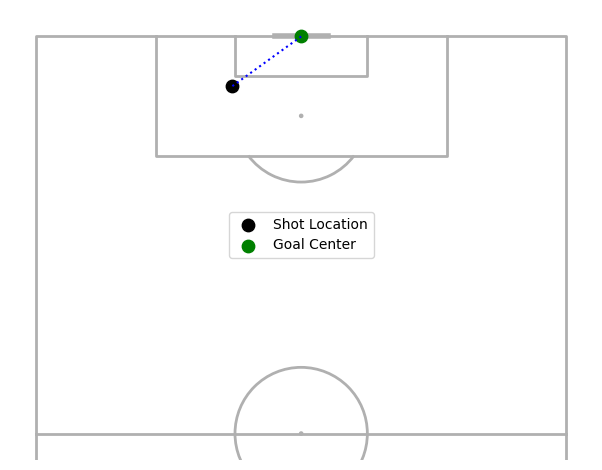

In [ ]:
pitch = VerticalPitch(half=True)
fig, ax = pitch.draw()
goal_center = [120, 40]
first_shot = shot_event["start_loc"].iloc[20]
plt.scatter(first_shot[1], first_shot[0], color='black', marker='o', s=80, label='Shot Location')
plt.plot([first_shot[1], goal_center[1]], [first_shot[0], goal_center[0]], linestyle='dotted', color='blue')
plt.scatter(goal_center[1], goal_center[0], color='green', marker='o', s=80, label='Goal Center')
# sns.scatterplot(x=[shot_event["start_loc"].iloc[0][1]], y=[shot_event["start_loc"].iloc[0][0]], ax=ax, color='red', s=100, label='First Shot')
plt.legend()
plt.show()

In [ ]:
# Goal cordination = [120,40]
shot_event['goal_distance'] = np.sqrt((shot_event['start_loc'].apply(lambda x: x[0]) - 120)**2 + (shot_event['start_loc'].apply(lambda x: x[1]) - 40)**2)

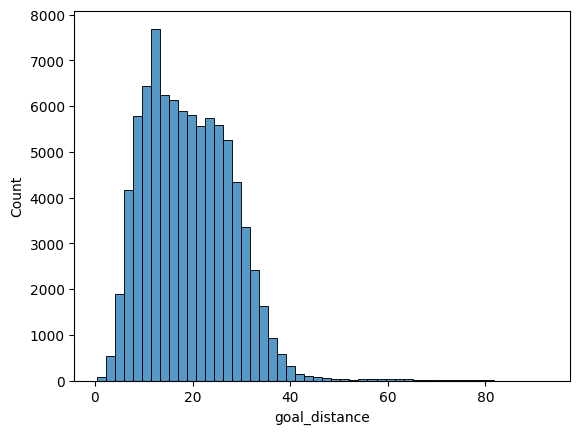

In [ ]:
sns.histplot(data = shot_event['goal_distance'], bins = 50)
plt.show()

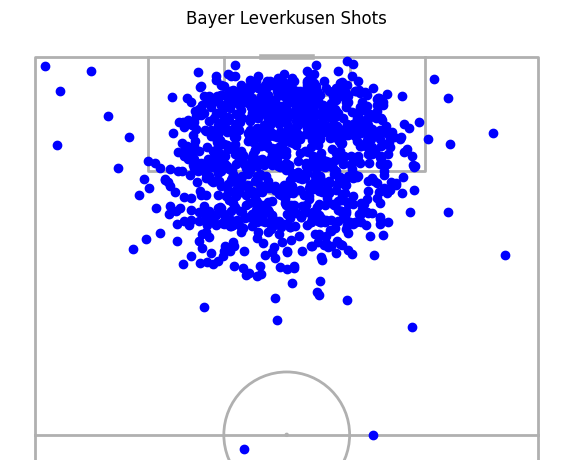

In [ ]:
Leverkusen_shots = shot_event[shot_event['team'] == 'Bayer Leverkusen']
X = Leverkusen_shots['start_loc'].apply(lambda x: x[0])
Y = Leverkusen_shots['start_loc'].apply(lambda x: x[1])

pitch = VerticalPitch(half=True)
fig, ax = pitch.draw()
plt.scatter(Y, X, c='blue') #plotting the shot map
plt.title('Bayer Leverkusen Shots')
plt.show()

# **CALCULATING SHOT ANGLE**

In [ ]:
X = shot_event['start_loc'].apply(lambda x: x[0])
Y = shot_event['start_loc'].apply(lambda x: x[1])

goal_length = 44 - 36

right_goalposts = np.sqrt((shot_event['start_loc'].apply(lambda x: x[0]) - 120)**2 + (shot_event['start_loc'].apply(lambda x: x[1]) - 44)**2)
left_goalposts = np.sqrt((shot_event['start_loc'].apply(lambda x: x[0]) - 120)**2 + (shot_event['start_loc'].apply(lambda x: x[1]) - 36)**2)

shot_event['angle'] = np.degrees(np.arccos((right_goalposts**2 + left_goalposts**2 - goal_length**2) / (2 * right_goalposts * left_goalposts)))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


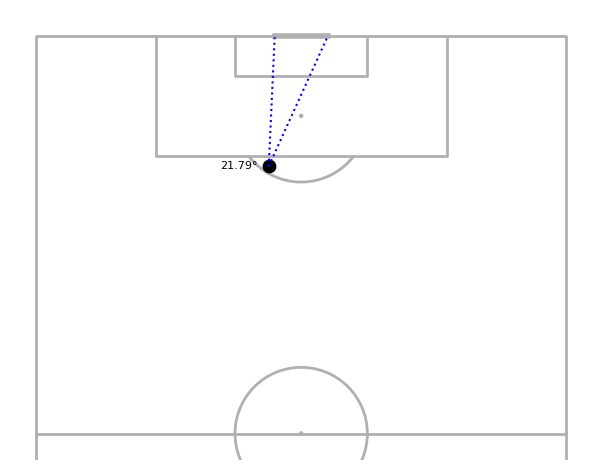

In [ ]:
pitch = VerticalPitch(half=True)
fig, ax = pitch.draw()
goal_right = [120, 44]
goal_left = [120, 36]
first_shot = shot_event["start_loc"].iloc[0]
plt.plot([first_shot[1], goal_right[1]], [first_shot[0], goal_right[0]], linestyle='dotted', color='blue')
plt.plot([first_shot[1], goal_left[1]], [first_shot[0], goal_left[0]], linestyle='dotted', color='blue')
chosen_angle = shot_event['angle'].iloc[0]
plt.scatter(first_shot[1], first_shot[0], color='black', marker='o', s=80, label='Shot Location')
plt.text(first_shot[1]-4.5, first_shot[0], f"{chosen_angle:.2f}°", fontsize=8, ha='center', va='center')
# sns.scatterplot(x=[shot_event["start_loc"].iloc[0][1]], y=[shot_event["start_loc"].iloc[0][0]], ax=ax, color='red', s=100, label='First Shot')
plt.show()

# **DIVIDING TEAMMATES AND OPPONENTS**

In [ ]:
def teammate_opponet_divider(status, freeze_frame):
  if status == 'teammate':
    try:
      teammate_list = filter(lambda x: x[1] == True, freeze_frame)
      locations = [player[0] for player in teammate_list]
      return np.array(locations)
    except:
      return 'None'
  elif status == 'opponent':
    try:
      opponent_list = filter(lambda x: x[1] == False, freeze_frame)
      locations = [player[0] for player in opponent_list]
      return np.array(locations)
    except:
      return 'None'

In [ ]:
shot_event['teammate_360'] = [teammate_opponet_divider('teammate', shot_event.loc[i]['freeze_frame']) for i in range(len(shot_event))]
shot_event['opponent_360'] = [teammate_opponet_divider('opponent', shot_event.loc[i]['freeze_frame']) for i in range(len(shot_event))]

In [ ]:
shot_event.head(2)

,match_id,event_id,event_time,event_period,play_pattern,team,event_name,start_loc,end_loc,under_pressure,...,open_goal,shot_type,shot_outcome,deflected,freeze_frame,xg,goal_distance,angle,teammate_360,opponent_360
0,3895302,c577e730-b9f5-44f2-9257-9e7730c23d7b,"(6, 48)",1,From Free Kick,Werder Bremen,Shot,"[100.4, 35.1]","[101.6, 35.2]",False,...,False,Open Play,Blocked,None,"[[[101.9, 35.1], False], [[107.2, 38.1], False...",0.056644,20.203218,21.792845,"[[94.4, 43.9], [89.8, 29.9], [100.4, 23.3], [9...","[[101.9, 35.1], [107.2, 38.1], [112.9, 42.4], ..."
1,3895302,bbc2c68d-c096-483d-abf4-32c0175a0f55,"(7, 40)",1,Regular Play,Bayer Leverkusen,Shot,"[114.6, 33.5]","[118.1, 35.7, 0.2]",True,...,False,Open Play,Saved,None,"[[[92.1, 63.8], False], [[92.9, 39.4], False],...",0.143381,8.450444,37.941499,"[[113.6, 39.8], [113.2, 58.8], [98.9, 48.8], [...","[[92.1, 63.8], [92.9, 39.4], [114.6, 39.1], [1..."


In [ ]:
def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

def is_point_in_triangle(pt, v1, v2, v3):
    b1 = sign(pt, v1, v2) < 0.0
    b2 = sign(pt, v2, v3) < 0.0
    b3 = sign(pt, v3, v1) < 0.0
    return b1 == b2 == b3

def count_points_in_triangle(points, v1, v2, v3):
  if (isinstance(points, np.ndarray)) & (isinstance(v3, list)):
    count = 0
    for pt in points:
        if is_point_in_triangle(pt, v1, v2, v3):
            count += 1
  else:
    count = 0
  return count

In [ ]:
count_points_in_triangle(shot_event['teammate_360'].loc[0],
                         [120, 44], [120, 36],
                         shot_event['start_loc'].loc[0])

2

# **COUNTING THE NUMBER OF TEAMMATES AND OPPONENTS IN TRIANGULAR ZONE**

In [ ]:
right_goalposts = [120, 44]
left_goalposts = [120, 36]
shot_event['N_teammates in triangle'] = shot_event.apply(lambda row: count_points_in_triangle(row['teammate_360'], right_goalposts, left_goalposts, row['start_loc']),axis=1)
shot_event['N_opponents in triangle'] = shot_event.apply(lambda row: count_points_in_triangle(row['opponent_360'], right_goalposts, left_goalposts, row['start_loc']),axis=1)

# **FUTURE TASKS**

## **Location of the triangular zone's inside opponents and teammates**

In [ ]:
def TRIANG_INDX(instance, kind):
  if kind == 'teammate':
    if (isinstance(instance['teammate_360'], np.ndarray)) & (isinstance(instance['start_loc'], list)):
      indx = [is_point_in_triangle(pt=pt, v1=[120, 44], v2=[120, 36], v3= instance['start_loc']) for pt in instance['teammate_360']]
    else:
      indx = 'None'
  elif kind == 'opponent':
    if (isinstance(instance['opponent_360'], np.ndarray)) & (isinstance(instance['start_loc'], list)):
      indx = [is_point_in_triangle(pt = pt, v1=[120, 44], v2=[120, 36], v3 = instance['start_loc']) for pt in instance['opponent_360']]
    else:
      indx = 'None'
  return indx

In [ ]:
shot_event['teammates in triangle indx'] = shot_event.apply(lambda row: TRIANG_INDX(instance=row, kind='teammate'),axis=1)
shot_event['opponents in triangle indx'] = shot_event.apply(lambda row: TRIANG_INDX(instance=row, kind='opponent'),axis=1)

In [ ]:
def TRIANG_LOC(instance, kind):
  if kind == 'teammate':
    try:
      return instance['teammate_360'][instance['teammates in triangle indx']]
    except:
      return 'None'
  elif kind == 'opponent':
    try:
      return instance['opponent_360'][instance['opponents in triangle indx']]
    except:
      return 'None'

In [ ]:
shot_event['teammates in triangle loc'] = shot_event.apply(lambda row: TRIANG_LOC(instance=row, kind='teammate'),axis=1)
shot_event['opponents in triangle loc'] = shot_event.apply(lambda row: TRIANG_LOC(instance=row, kind='opponent'),axis=1)

In [ ]:
shot_event.head(2)

,match_id,event_id,event_time,event_period,play_pattern,team,event_name,start_loc,end_loc,under_pressure,...,goal_distance,angle,teammate_360,opponent_360,N_teammates in triangle,N_opponents in triangle,teammates in triangle indx,opponents in triangle indx,teammates in triangle loc,opponents in triangle loc
0,3895302,c577e730-b9f5-44f2-9257-9e7730c23d7b,"(6, 48)",1,From Free Kick,Werder Bremen,Shot,"[100.4, 35.1]","[101.6, 35.2]",False,...,20.203218,21.792845,"[[94.4, 43.9], [89.8, 29.9], [100.4, 23.3], [9...","[[101.9, 35.1], [107.2, 38.1], [112.9, 42.4], ...",2,2,"[False, False, False, False, True, True, False]","[False, True, False, False, False, False, Fals...","[[107.1, 36.9], [113.2, 38.5]]","[[107.2, 38.1], [118.4, 38.5]]"
1,3895302,bbc2c68d-c096-483d-abf4-32c0175a0f55,"(7, 40)",1,Regular Play,Bayer Leverkusen,Shot,"[114.6, 33.5]","[118.1, 35.7, 0.2]",True,...,8.450444,37.941499,"[[113.6, 39.8], [113.2, 58.8], [98.9, 48.8], [...","[[92.1, 63.8], [92.9, 39.4], [114.6, 39.1], [1...",0,1,"[False, False, False, False, False]","[False, False, False, True, False, False, Fals...",[],"[[118.3, 36.4]]"


## **Cartesian to Polar**

In [ ]:
import cv2

In [ ]:
def gaussian_kernel(size, sigma):
    """Generates a Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) *
                      np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

In [ ]:
arr = np.array([[1,1],[1/2,0],[-1,-1]])
np.degrees(np.arctan2(arr[:,1], arr[:,0]))

array([  45.,    0., -135.])

In [ ]:
np.linalg.norm(arr, axis=1)

array([1.41421356, 0.5       , 1.41421356])

In [ ]:
np.column_stack((np.degrees(np.arctan2(arr[:,1], arr[:,0])), np.linalg.norm(arr, axis=1)))

array([[  45.        ,    1.41421356],
       [   0.        ,    0.5       ],
       [-135.        ,    1.41421356]])

In [ ]:
shot_event['start_loc'].iloc[0]

[100.4, 35.1]

In [ ]:
def Cart2Grid(instance, kind):
  if kind == 'teammate':
    # print(kind)
    try:
      # calculating distance vector
      print('try ',kind)
      goal_distance_vec = np.array([120,40]) - np.array(instance['start_loc'])
      print('1')
      vecs = np.array(instance['teammates in triangle loc']) - np.array(instance['start_loc'])
      print('2')
      print(f'{vecs}')
      # calculate the angle between goal distance vector and x-axis
      theta = -np.arctan2(goal_distance_vec[1], goal_distance_vec[0])
      print(f'{theta}')
      # Rotation Matrix R
      R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
      # Rotate vecs with theta
      rotated_vecs = np.dot(vecs, R)
      # Polar representation
      deg = np.arctan2(rotated_vecs[:,1], rotated_vecs[:,0])
      mag = np.linalg.norm(rotated_vecs, axis=1)
      polar = np.column_stack((deg, mag))
      # 2D Histogram
      R = np.array([[np.cos(np.pi/2), -np.sin(np.pi/2)], [np.sin(np.pi/2),  np.cos(np.pi/2)]])
      polar = np.dot(polar, R)
      # Gaussian Kernel
      return cv2.filter2D(src = np.histogram2d(polar[:,0], polar[:,1], bins = 25)[0],
                         ddepth = -1,
                         kernel = gaussian_kernel(11, sigma=2),
                         borderType = cv2.BORDER_CONSTANT)
    except:
      return 'None'
      # return np.zeros((25,25))

  elif kind == 'opponent':
    try:
      # calculating distance vector
      goal_distance_vec = np.array([120,40]) - np.array(instance['star_loc'])
      vecs = np.array(instance['opponents in triangle loc']) - np.array(instance['star_loc'])
      # calculate the angle between goal distance vector and x-axis
      theta = -np.arctan2(goal_distance_vec[1], goal_distance_vec[0])
      # Rotation Matrix R
      R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
      # Rotate vecs with theta
      rotated_vecs = np.dot(vecs, R)
      # Polar representation
      deg = np.arctan2(rotated_vecs[:,1], rotated_vecs[:,0])
      mag = np.linalg.norm(rotated_vecs, axis=1)
      polar = np.column_stack((deg, mag))
      # 2D Histogram
      R = np.array([[np.cos(np.pi/2), -np.sin(np.pi/2)], [np.sin(np.pi/2),  np.cos(np.pi/2)]])
      polar = np.dot(polar, R)
      # Gaussian Kernel
      return cv2.filter2D(src = np.histogram2d(polar[:,0], polar[:,1], bins = 25)[0],
                         ddepth = -1,
                         kernel = gaussian_kernel(11, sigma=2),
                         borderType = cv2.BORDER_CONSTANT)
    except:
      return np.zeros((25,25))

In [ ]:
Cart2Grid(shot_event.iloc[0], 'teammate')

try  teammate
1
2
[[ 6.7  1.8]
 [12.8  3.4]]
-0.24497866312686414


array([[ 4.02264854e-02,  3.54997488e-02,  2.43985967e-02,
         1.30596277e-02,  5.44406279e-03,  1.76742842e-03,
        -1.06010879e-18, -4.04768811e-18,  1.15648232e-18,
        -7.70988212e-19,  7.70988212e-18,  0.00000000e+00,
         2.67078151e-18,  2.87736718e-18, -1.54197642e-18,
         1.33539075e-18,  4.96391523e-18,  2.44022665e-18,
         3.88051587e-18,  5.36045584e-18,  4.34570172e-18,
         5.61588189e-18, -2.23732003e-19,  6.90428376e-18,
        -2.67078151e-18],
       [ 3.54997488e-02,  3.13284183e-02,  2.15316860e-02,
         1.15250810e-02,  4.80436855e-03,  1.55975010e-03,
         2.69845874e-18, -1.63834995e-18, -7.70988212e-19,
         7.70988212e-19, -3.08395285e-18,  3.08395285e-18,
         1.54197642e-18,  4.41934360e-18, -6.67695377e-19,
         3.08395285e-18,  7.59003619e-19, -3.08884935e-20,
        -7.88965101e-19, -6.58429697e-19,  1.63674973e-18,
         2.78570582e-19,  3.20070287e-18,  2.42347743e-18,
         1.54197642e-18],
    

try  teammate
1
2
[[ 6.7  1.8]
 [12.8  3.4]]
-0.24497866312686414


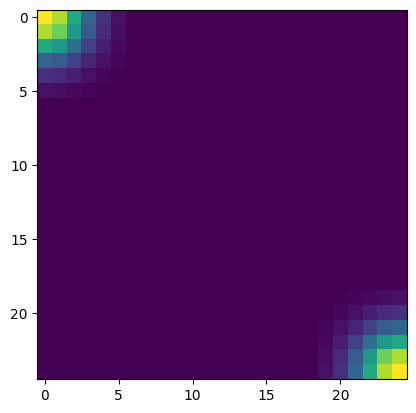

In [ ]:
plt.imshow(Cart2Grid(shot_event.iloc[0], 'teammate'))

In [ ]:
instance = shot_event.iloc[0]

In [ ]:
np.array([120,40]) - np.array(instance['star_loc'])

KeyError: 'star_loc'

## **QUARESMA GOAL AGAINST IRAN**

In [ ]:
matches['match_id'][(matches['away_team'] == 'Portugal') & (matches['home_team'] == 'Iran')]

,match_id
839,7557


In [ ]:
Quaresma_Goal = shot_event[(shot_event['shot_outcome'] == 'Goal') & (shot_event['match_id'] == 7557) & (shot_event['team'] == 'Portugal')]
Quaresma_Goal

,match_id,event_id,event_time,event_period,play_pattern,team,event_name,start_loc,end_loc,under_pressure,...,shot_outcome,deflected,freeze_frame,xg,shot_length,teammate_360,opponent_360,teammates in triangle,opponents in triangle,angel
21401,7557,d291d216-1465-404e-b3f4-3b651c5cccc8,"(44, 19)",1,Regular Play,Portugal,Shot,"[102.0, 58.0]","[120.0, 36.2, 1.7]",False,...,Goal,None,"[[[109.0, 31.0], True], [[94.0, 60.0], True], ...",0.019847,25.455844,"[[109.0, 31.0], [94.0, 60.0], [106.0, 69.0], [...","[[120.0, 44.0], [103.0, 58.0], [100.0, 62.0], ...",0,1,12.835609


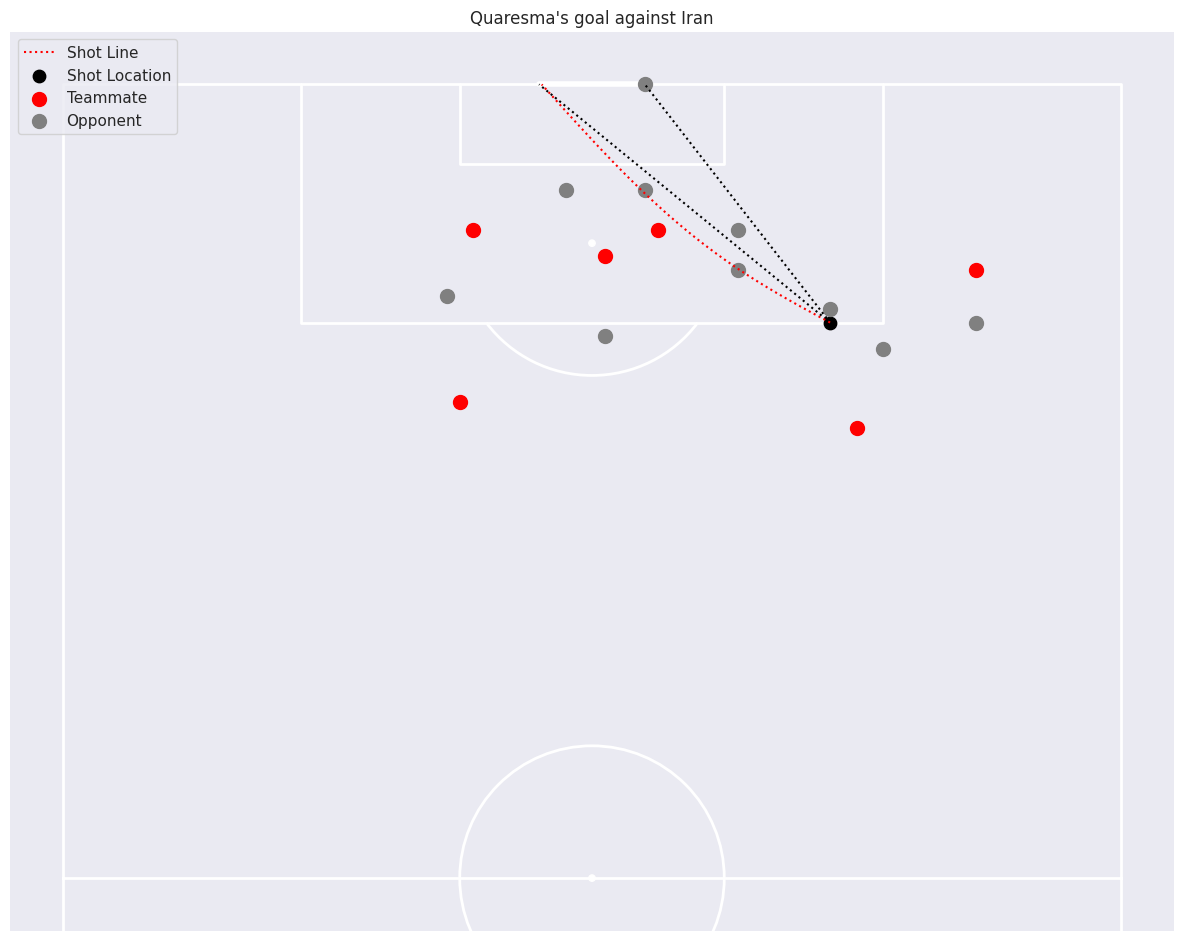

In [ ]:
pitch = VerticalPitch(half=True)
fig, ax = pitch.draw(figsize=(12, 12))

shot_loc = Quaresma_Goal["start_loc"].iloc[0]
end_loc = Quaresma_Goal["end_loc"].iloc[0]
teammates = Quaresma_Goal['teammate_360'].iloc[0]
opponents = Quaresma_Goal['opponent_360'].iloc[0]

goal_right = [120, 44]
goal_left = [120, 36]

plt.plot([shot_loc[1], goal_right[1]], [shot_loc[0], goal_right[0]], linestyle='dotted', color='black')
plt.plot([shot_loc[1], goal_left[1]], [shot_loc[0], goal_left[0]], linestyle='dotted', color='black')

curve_x = np.linspace(shot_loc[1], end_loc[1], 100)
curve_y = (
    shot_loc[0]
    + (end_loc[0] - shot_loc[0]) * (curve_x - shot_loc[1]) / (end_loc[1] - shot_loc[1])
    - 2 * np.sin(np.linspace(0, np.pi, 100))  # Add curvature (sinusoidal)
)
plt.plot(curve_x, curve_y, linestyle='dotted', color='red', label='Shot Line')

plt.scatter(shot_loc[1], shot_loc[0], color='black', marker='o', s=80, label='Shot Location')

for teammate in teammates:
    plt.scatter(teammate[1], teammate[0], color='red', label='Teammate', s=100)

for opponent in opponents:
    plt.scatter(opponent[1], opponent[0], color='gray', label='Opponent', s=100)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.title("Quaresma's goal against Iran")
plt.show()


## **EDA**

In [ ]:
shot_event.describe()

,match_id,event_period,xg,shot_length,teammates in triangle,opponents in triangle,angel,goal_dastance
count,8.711100e+04,87111.000000,87111.000000,87111.000000,87111.000000,87111.000000,87104.000000,87111.000000
mean,2.970974e+06,1.563499,0.106297,19.202526,0.184466,1.709841,25.384712,19.202526
std,1.558242e+06,0.557955,0.149382,8.752675,0.474959,1.053728,15.787333,8.752675
min,7.298000e+03,1.000000,0.000180,0.400000,0.000000,0.000000,0.000000,0.400000
25%,3.749233e+06,1.000000,0.027673,12.010620,0.000000,1.000000,15.021798,12.010620
50%,3.825632e+06,2.000000,0.054790,18.445596,0.000000,1.000000,19.726571,18.445596
75%,3.879845e+06,2.000000,0.110060,25.525673,0.000000,2.000000,31.464010,25.525673
max,3.943077e+06,5.000000,0.995122,92.800862,5.000000,11.000000,180.000000,92.800862


In [ ]:
shot_event['play_pattern'].value_counts()

,count
play_pattern,
Regular Play,28870
From Free Kick,17915
From Throw In,15325
From Corner,13924
From Counter,3938
From Goal Kick,3305
Other,1472
From Keeper,1366
From Kick Off,996


In [ ]:
shot_event['technique'].value_counts()


,count
technique,
Normal,67956
Half Volley,11593
Volley,5580
Lob,865
Overhead Kick,451
Backheel,336
Diving Header,330


In [ ]:
shot_event['shot_type'].value_counts()

,count
shot_type,
Open Play,81551
Free Kick,4221
Penalty,1310
Corner,28
Kick Off,1


In [ ]:
shot_event['deflected'].value_counts()

,count
deflected,
None,85971
True,1140


In [ ]:
shot_event['body_part'].value_counts()

,count
body_part,
Right Foot,45683
Left Foot,27362
Head,13813
Other,253


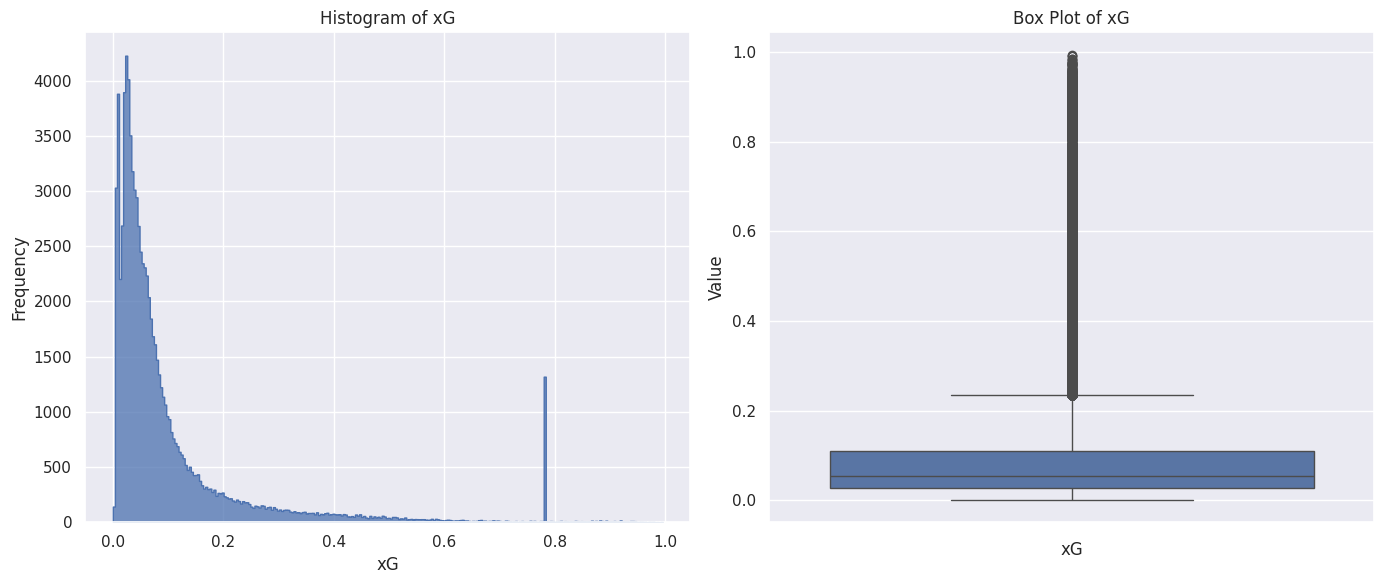

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.set(style="darkgrid")

sns.histplot(data=shot_event, x='xg', element='step', common_norm=False, ax=axes[0])
axes[0].set_title('Histogram of xG')
axes[0].set_xlabel('xG')
axes[0].set_ylabel('Frequency')

sns.boxplot(data=shot_event, y='xg', ax=axes[1])
axes[1].set_title('Box Plot of xG')
axes[1].set_xlabel('xG')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()


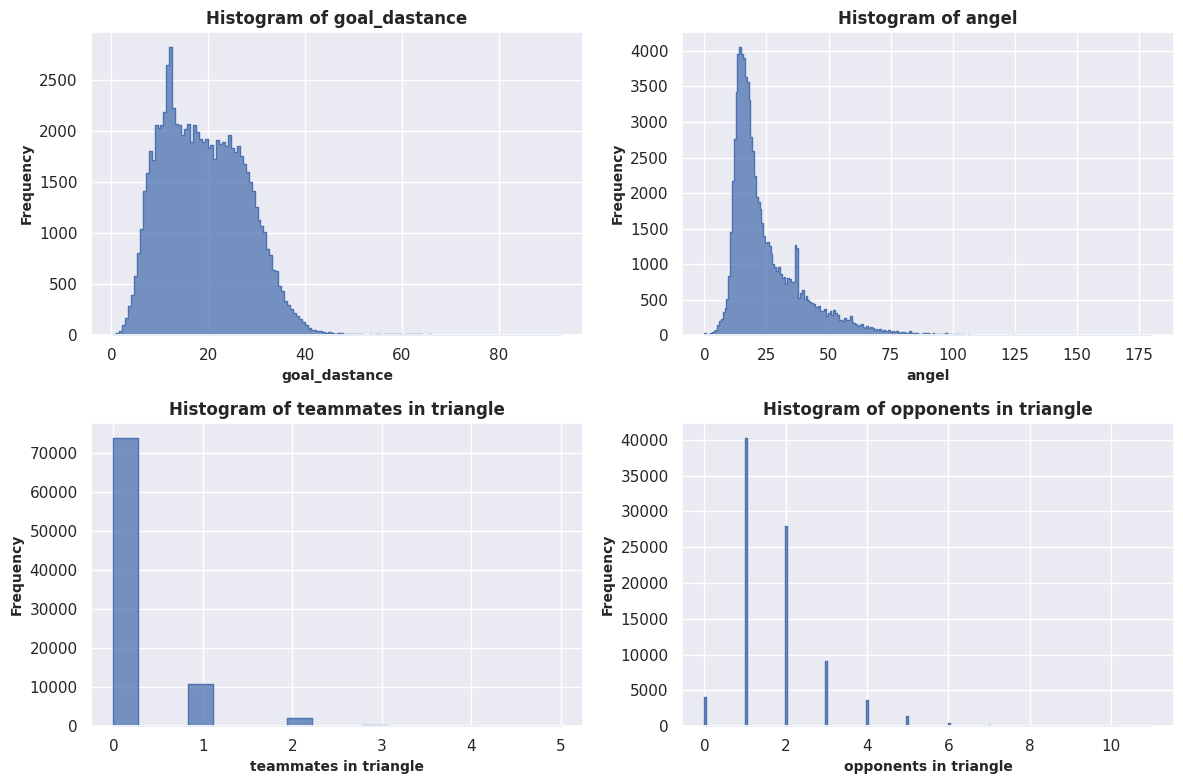

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()

sns.set(style="darkgrid")

numeric_features = ['goal_dastance','angel', 'teammates in triangle', 'opponents in triangle']

for i, feature in enumerate(numeric_features):
    sns.histplot(data=shot_event, x=feature, element='step', common_norm=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=10,fontweight='bold')
    axes[i].set_ylabel('Frequency', fontsize=10,fontweight='bold')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

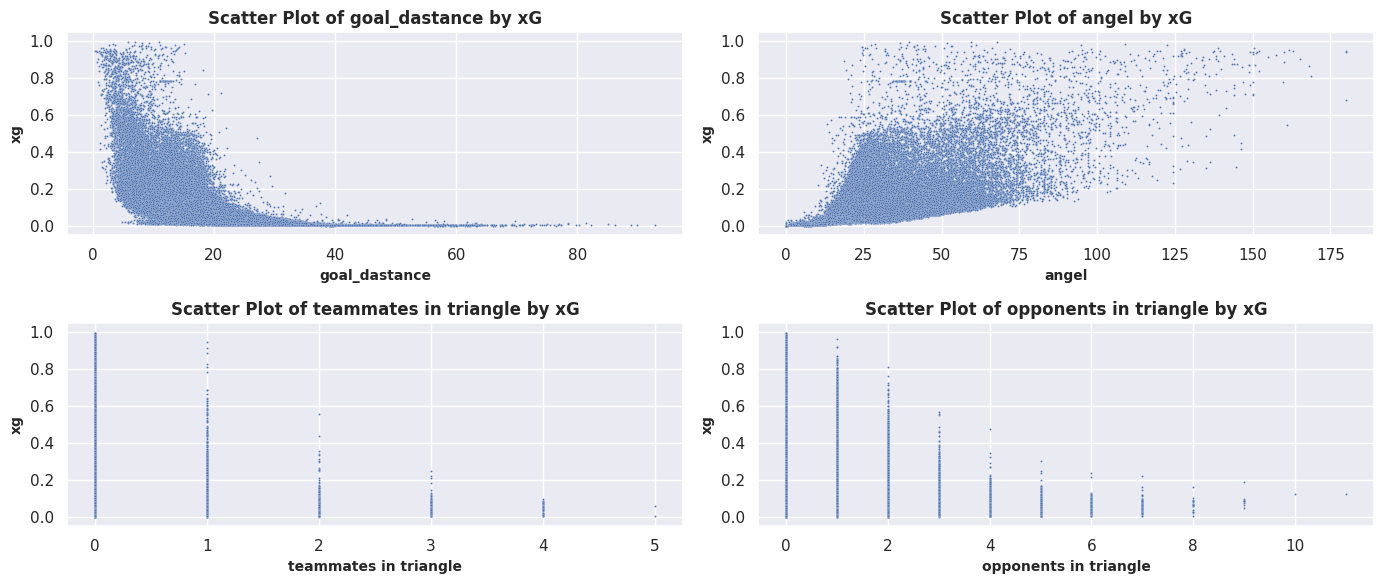

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
axes = axes.flatten()

sns.set(style="darkgrid")

for i, feature in enumerate(numeric_features):
    sns.scatterplot(data=shot_event, x=feature, y='xg', s=2, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {feature} by xG', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('xg', fontsize=10,fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=10,fontweight='bold')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

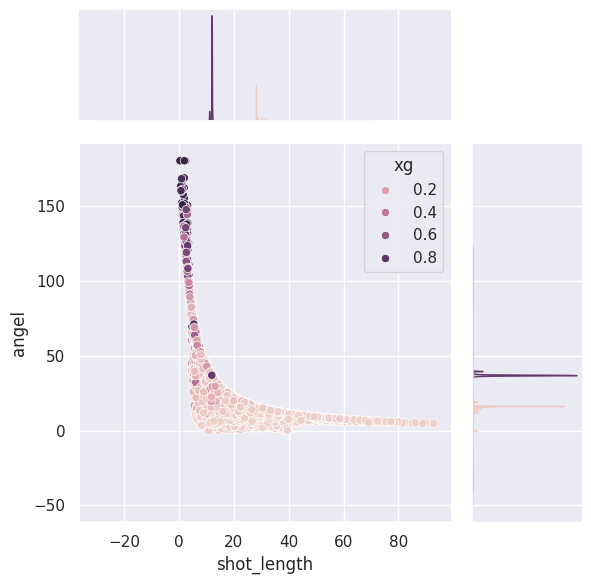

In [ ]:
sns.jointplot(data= shot_event, x='shot_length', y='angel', hue='xg', kind='scatter', height=6, ratio=3)

In [ ]:
shot_event.columns

Index(['match_id', 'event_id', 'event_time', 'event_period', 'play_pattern',
       'team', 'event_name', 'start_loc', 'end_loc', 'under_pressure',
       'follows_dribble', 'first_time', 'technique', 'body_part', 'open_goal',
       'shot_type', 'shot_outcome', 'deflected', 'freeze_frame', 'xg',
       'shot_length', 'teammate_360', 'opponent_360', 'teammates in triangle',
       'opponents in triangle', 'angel'],
      dtype='object')

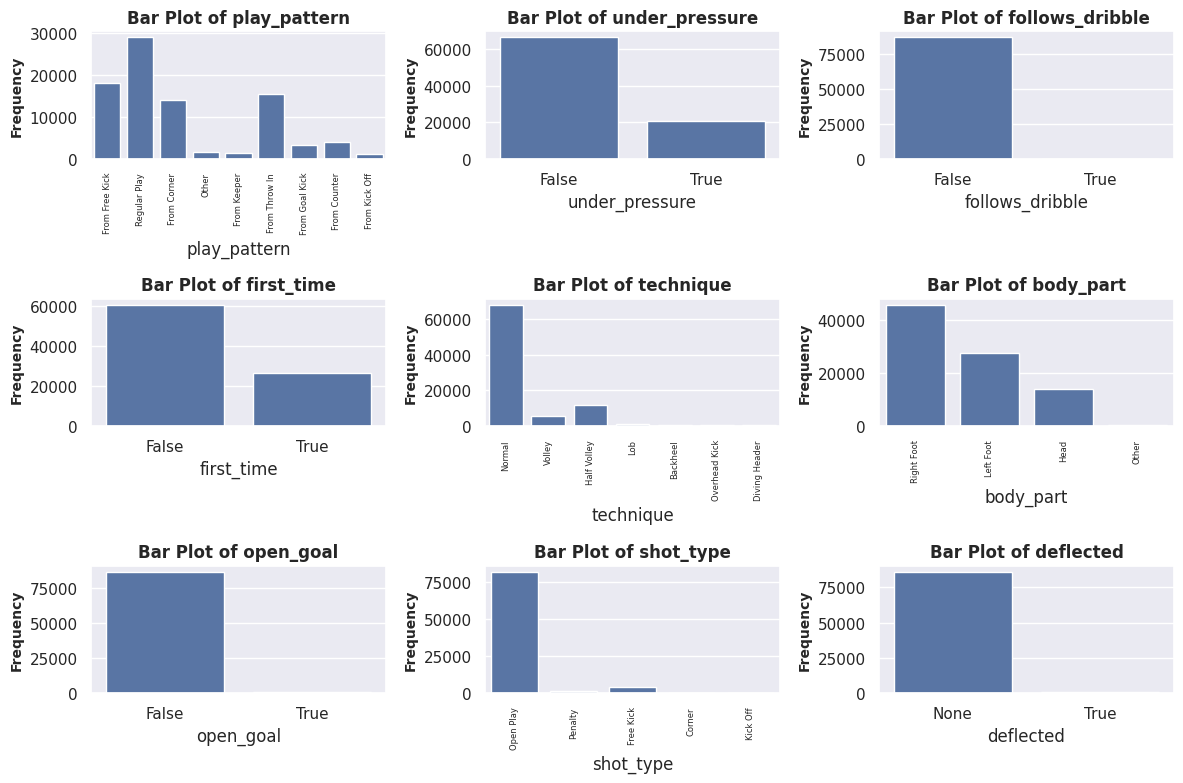

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(12,8))
axes = axes.flatten()

sns.set(style="darkgrid")

categorical_features = ['play_pattern','under_pressure', 'follows_dribble', 'first_time', 'technique', 'body_part', 'open_goal', 'shot_type', 'deflected']

for i, feature in enumerate(categorical_features):
    sns.countplot(data=shot_event, x=feature, ax=axes[i])
    axes[i].set_title(f'Bar Plot of {feature}', fontweight='bold')
    axes[i].set_ylabel('Frequency', fontsize=10,fontweight='bold')

    if i in [0,4,5,7]:
        axes[i].set_xlabel(feature)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center', fontsize=6)
    else:
        axes[i].set_xlabel(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<ipython-input-84-1f2f49cbe3fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=shot_event, x=feature, y='xg', ax=axes[i], palette='Set2')
<ipython-input-84-1f2f49cbe3fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=shot_event, x=feature, y='xg', ax=axes[i], palette='Set2')
<ipython-input-84-1f2f49cbe3fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=shot_event, x=feature, y='xg', ax=axes[i], palette='Set2')
<ipython-input-84-1f2f49cbe3fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

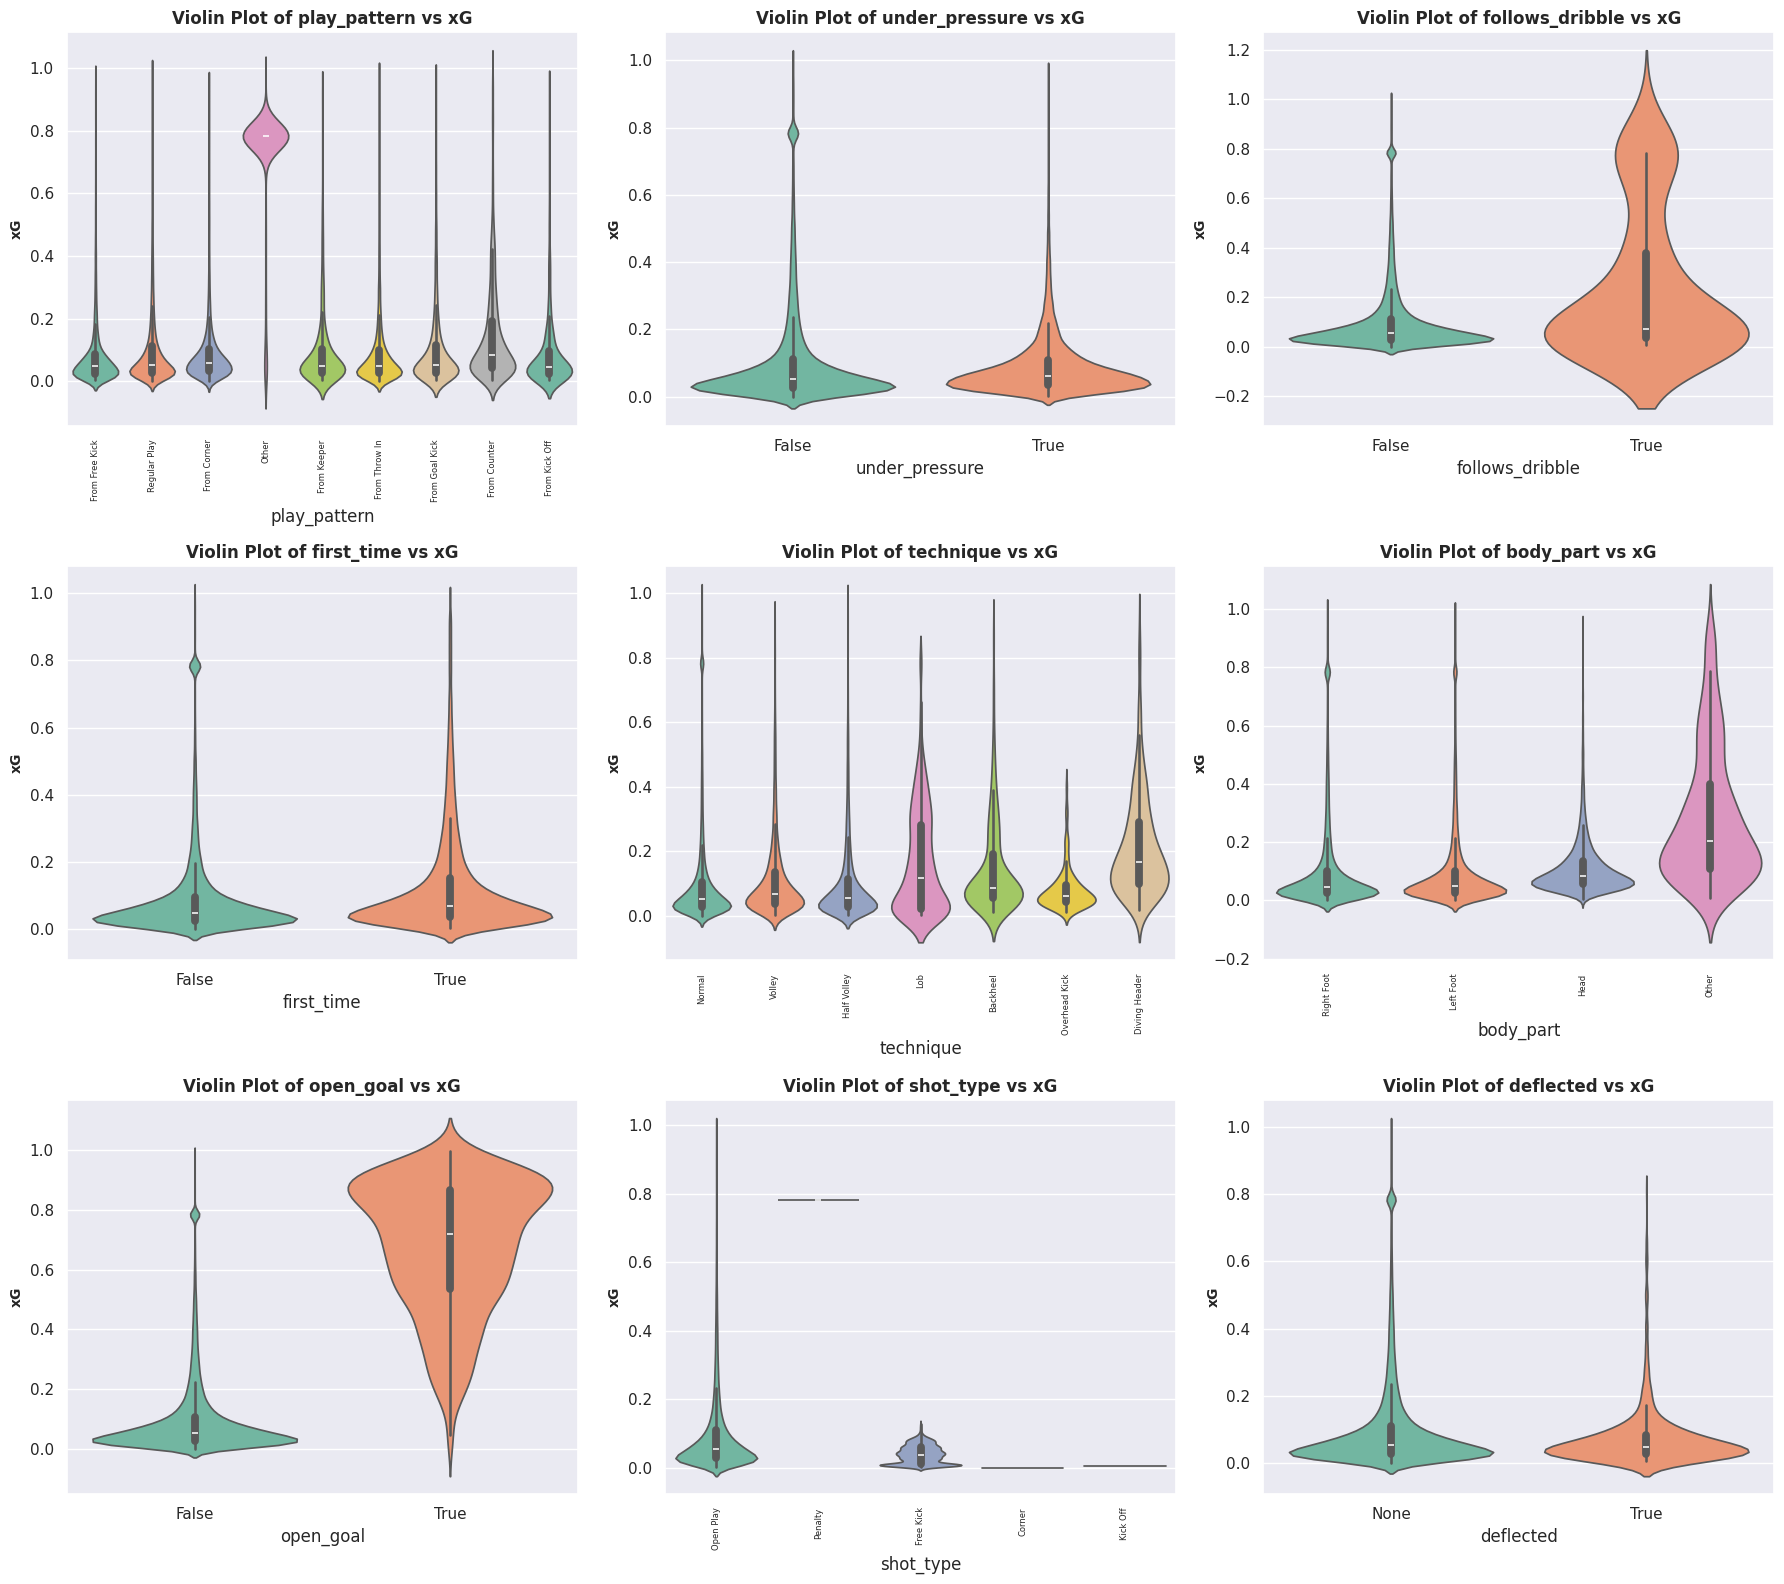

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(18,16))
axes = axes.flatten()
sns.set(style="darkgrid")
for i, feature in enumerate(categorical_features):
    # Convert count plot to violin plot with xG as the y-axis
    sns.violinplot(data=shot_event, x=feature, y='xg', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Violin Plot of {feature} vs xG', fontweight='bold')
    axes[i].set_ylabel('xG', fontsize=10, fontweight='bold')

    if i in [0,4,5,7]:
        axes[i].set_xlabel(feature)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center', fontsize=6)
    else:
        axes[i].set_xlabel(feature)

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()